In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
house_data = pd.read_csv('../datasets/kc_house_data.csv')

In [48]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [68]:
#Shuffle the data points
house_data = house_data.sample(frac = 1).reset_index(drop = True)

In [69]:
#Importing OneHotEncoer 
from sklearn.preprocessing import OneHotEncoder

#one-hot-encoding for zipcode: To have location of the houses as categories
zipcode_ohe = OneHotEncoder()

In [70]:
#Transform the house data -> then reshape to 2 dimensional array
X = zipcode_ohe.fit_transform(house_data.zipcode.values.reshape(-1 , 1)).toarray()

In [71]:
#Panda data frame
df_oneshot = pd.DataFrame(X, columns = ["zipcode_" + str(int(i)) for i in range (X.shape[1])])

#Add the zipcode dataframe to the house data frame
house_data = pd.concat([house_data, df_oneshot], axis = 1)

In [53]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_60,zipcode_61,zipcode_62,zipcode_63,zipcode_64,zipcode_65,zipcode_66,zipcode_67,zipcode_68,zipcode_69
0,1853000030,20150416T000000,775000.0,3,2.50,3550,32807,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1222000055,20141123T000000,180250.0,2,0.75,900,9600,1.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7300410110,20140519T000000,390000.0,4,2.50,2490,8290,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6154500070,20140626T000000,1050000.0,4,3.50,3450,7832,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1438000360,20140603T000000,494995.0,5,2.75,2670,3800,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
x_data = house_data.drop(columns = ['id', 'price', 'lat', 'long', 'date', 'zipcode'])

#The house price is variable to predict
y_data = house_data ['price']

In [73]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [74]:
#80:20 Train:Test split
train_data = x_data[:-4322]
test_data = x_data[-4322:]

train_labels = y_data[:-4322]
test_labels = y_data[-4322:]

In [75]:
train_data.shape

(17291, 85)

In [76]:
#fit_intercept = False) - default true, can cause errors with correlation
regr = linear_model.LinearRegression(fit_intercept = False)

In [78]:
regr.fit(train_data, train_labels)

LinearRegression(fit_intercept=False)

In [79]:
train_predictions = regr.predict(train_data)

test_predictions = regr.predict(test_data)

In [80]:
print('Coefficient: \n', regr.coef_)

Coefficient: 
 [-2.65313810e+04  2.35968189e+04  2.90389432e+12  2.23615492e-01
 -4.28991949e+04  6.02799038e+05  5.48375520e+04  2.52561010e+04
  5.81665753e+04 -2.90389432e+12 -2.90389432e+12 -7.42873540e+02
  1.63829916e+01  1.23879787e+01 -1.03333873e-01  9.44561710e+05
  9.73596243e+05  9.22624032e+05  1.69485929e+06  1.24296785e+06
  1.21630186e+06  1.18823589e+06  1.19487958e+06  1.00815614e+06
  1.05691908e+06  1.04300117e+06  1.02511313e+06  9.29126719e+05
  9.14623096e+05  1.08982845e+06  1.11106994e+06  1.06092760e+06
  1.15146817e+06  9.48737337e+05  9.56515422e+05  9.41795342e+05
  1.29561248e+06  1.14179503e+06  9.77482683e+05  2.27713898e+06
  1.46729033e+06  9.52455810e+05  1.03229209e+06  1.17069211e+06
  1.13320615e+06  9.89545462e+05  1.03635268e+06  9.69274952e+05
  1.02648396e+06  1.02282159e+06  9.42935449e+05  1.08943382e+06
  1.10837353e+06  1.10896941e+06  1.05816881e+06  9.05020692e+05
  1.48108718e+06  1.27922118e+06  1.40241607e+06  1.09192132e+06
  1.290073

In [81]:
mse = mean_squared_error(test_labels, test_predictions)

print("Mean squared error: %.2f"% mse)

Mean squared error: 27931296563.94


In [82]:
import math
math.sqrt(mse)

167126.58844103655

In [83]:
print('R^2 score for training data: %.2f' % r2_score(train_labels, train_predictions))
print('R^2 score for test data: %.2f' % r2_score(test_labels, test_predictions))

R^2 score for training data: 0.81
R^2 score for test data: 0.81


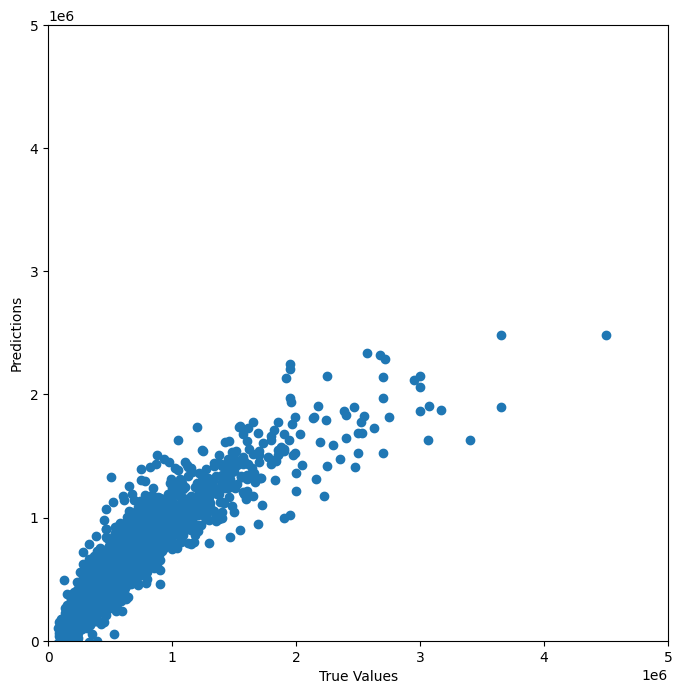

In [86]:
test_predictions.flatten()

plt.figure(figsize = (8, 8))

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.xlim(0, 5000000)
plt.ylim(0, 5000000)

plt.show()